# Exercice de Machine Learning

Exercice consistant à utiliser un dataset dans l'objectif d'entraîner différents algorithmes de machine learning.

Origine du dataset : kaggle.com "cardiovascular-risk-factor-data" : To predict the 10-year risk of future coronary heart disease (CHD) in patients https://www.kaggle.com/datasets/mamta1999/cardiovascular-risk-data

*"Variables Description

Demographic:

Sex: male or female ("M" or "F") Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) Education: The level of education of the patient (categorical values - 1,2,3,4) Behavioral:

is_smoking: whether or not the patient is a current smoker ("YES" or "NO") Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical (history):

BP Meds: whether or not the patient was on blood pressure medication (Nominal) Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) Prevalent Hyp: whether or not the patient was hypertensive (Nominal) Diabetes: whether or not the patient had diabetes (Nominal) Medical (current):

Tot Chol: total cholesterol level (Continuous) Sys BP: systolic blood pressure (Continuous) Dia BP: diastolic blood pressure (Continuous) BMI: Body Mass Index (Continuous) Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) Glucose: glucose level (Continuous) Predict variable (desired target):

10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)"*

# Objectif de cette révision

- Préparer les données, sélectionner les modèles ML et les optimiser de façon méthodique
- Train Test Split
- Cross Validation
- Validation Curve
- GridSearchCV
- Learning Curves

Je me baserai également sur la méthodologie appliquée dans l'étude "Machine Learnia".

### Check-list EDA

Analyse de la forme
- Identification de la target : la variable "TenYearCHD".
- Nombre de lignes/colonnes : 3390 lignes pour 16 colonnes.
- Types de variables : 14 variables quantitatives, 2 variables qualitatives
- Identifier les NaN : très peu de NaN, seule la variable "glucose" comporte 9% de NaN.

Analyse de fond
- Visualisation de la target : la variable cible compte environ 15% de cas positifs, pour 85% de négatifs. Elle n'est pas équilibrée.
- Compréhension des différentes variables
    * variables quantitatives : répartition normale pour la majorité. Il s'agit de données issues de tests sanguins.
    * variables qualitatives : aucune variable équilibrée, excepté 'is_smoking'. Il s'agit d'informations sur l'état cardiaque des patients et leur tabagie.
- Visualisation des relations features-target
    * Il semble que l'âge aient une relation avec la cible
    * Il semble que le sexe, la tabagie et la pression sanguine (sys et dia) aient une relation avec la cible
    * Il semble que le taux de glucose ait une relation avec la cible.
- Visualisation des corrélations entre variables :
    * Il y a une corrélation d'environ 35-40% entre les variables de pression sanguine et l'indice de masse corporelle
    * Il y a une corrélation de 40% entre l'âge et la pression sanguine systolique (sysBP)
    * Il y a une forte corrélation entre les variables de pression sanguine et les cas d'hyper-tension.
    * Il y a une forte corrélation entre le taux de glucose et les cas de diabète.
- Visualisation des corrélations target - features : 
    * Seules 7 variables ont un taux de corrélation supérieur à 10% avec la cible (totChol, diabetes, diaBP, glucose, prevalentHyp, sysBP et age)
- Identification des outliers
    * On constate une large répartition des outliers dans les colonnes 'totChol' et 'glucose'.

### Check-list preprocessing

Mise en forme des données
- Création des trainset/testset
- Elimination des NaN
- Encodage des variables catégorielles

Amélioration des perfomrances du modèle
- Suppression des outliers
- Feature selection
- Feature engineering
- Feature scaling

### Check-list modelling
- Définir une fonction d'évaluation
- Entraînement des différents modèles
- Optimisation avec GridSearchCV
- Analyse des erreurs et retour au preprocessing/EDA (optionnel)
- Learning curve et prise de décision

# Introduction - Chargement des principales bibliothèques et du dataset

In [1]:
# Import des librairies de base

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Chargement des données et affichage du dataframe

data = pd.read_csv('data_cardiovascular_risk.csv', index_col='id')

data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


# 1 - EDA (Exploratory Data Analysis)

Contrôle des données pour détecter les valeurs nulles ou aberrantes.

In [3]:
# Création d'un dataframe df, copie du dataframe data initial : 

df = data.copy()

In [4]:
# Nombre de lignes et de colonnes :
df.shape

(3390, 16)

In [5]:
# Types de variables :
df.dtypes.value_counts()

float64    9
int64      5
object     2
dtype: int64

In [6]:
df.info()

# Nous pouvons constater que deux variables catégorielles ('sex' et 'is_smoking') sont des chaînes de caractères.
# Nous allons les remplacer par des modalités sous forme de valeurs numériques.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [7]:
df['sex'] = df['sex'].replace(to_replace = ['F','M'], value = [0,1])

df['is_smoking'] = df['is_smoking'].replace(to_replace = ['NO','YES'], value = [0,1])

In [8]:
for col in df.columns :
    print(col)
    print(df[col].value_counts())

age
40    148
42    145
41    144
46    140
39    139
44    135
48    134
45    131
43    127
38    119
52    118
55    116
50    115
53    114
51    114
47    108
54    107
49    104
57     97
58     95
60     95
63     93
59     93
56     92
61     87
62     80
64     75
36     75
37     73
65     43
67     33
66     30
35     29
34     16
68     14
69      5
33      4
70      2
32      1
Name: age, dtype: int64
education
1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
sex
0    1923
1    1467
Name: sex, dtype: int64
is_smoking
0    1703
1    1687
Name: is_smoking, dtype: int64
cigsPerDay
0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0     

In [9]:
# On peut isoler deux groupes de variables, les quantitatives et qualitatives :

quant_col = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI','heartRate', 'glucose']

qual_col = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke','prevalentHyp', 'diabetes']

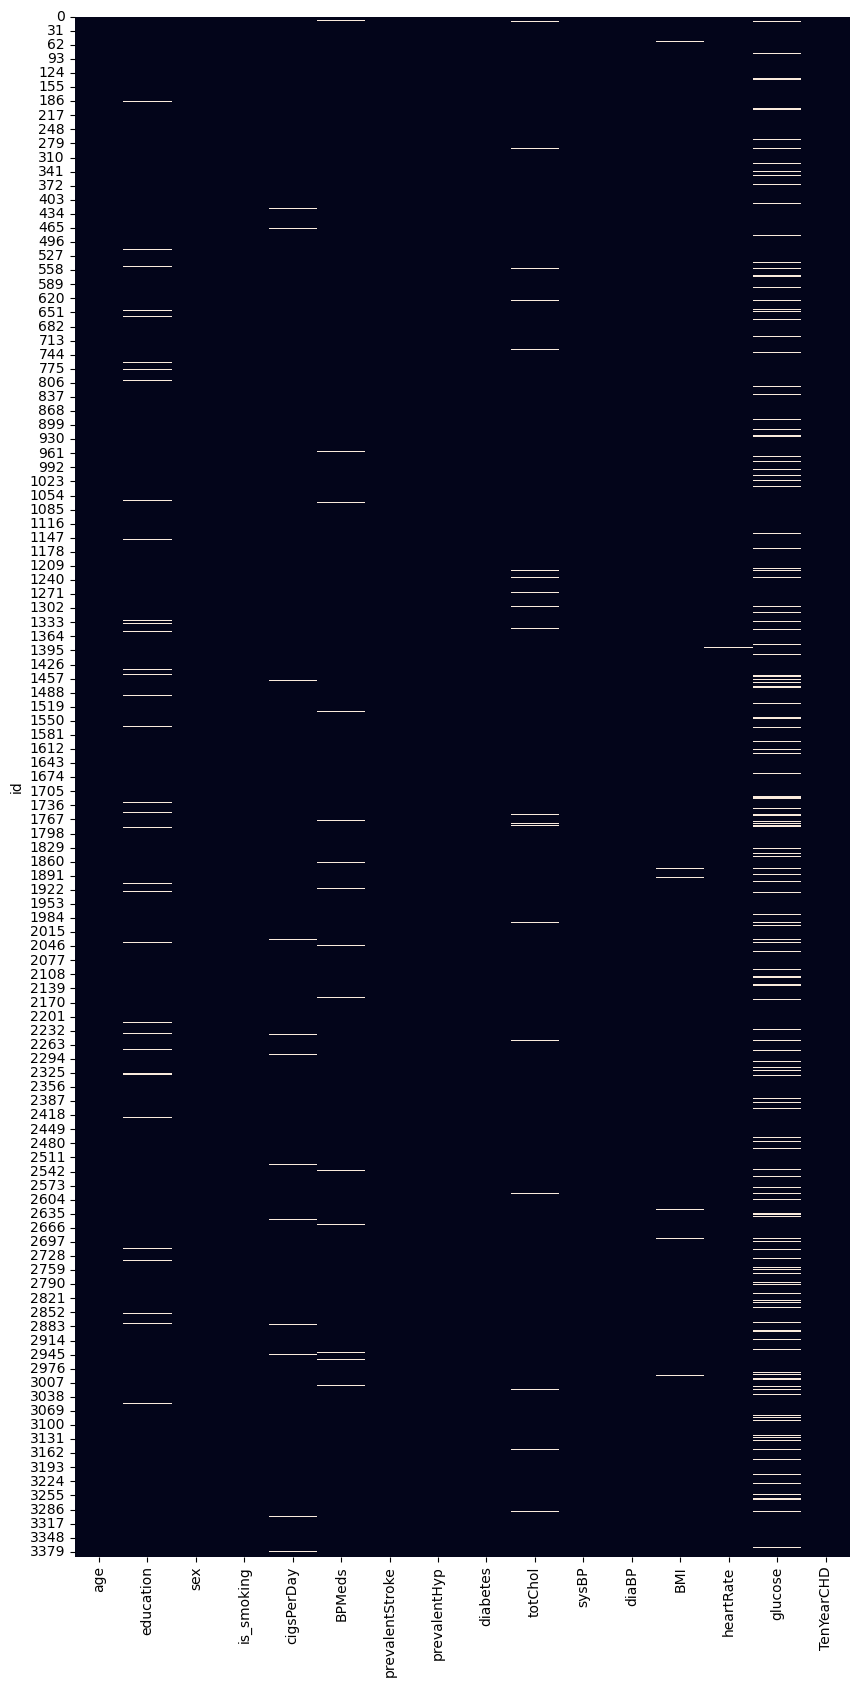

In [10]:
# Affichage des NaN du dataframe (les zones claires représentent les vides) :
plt.figure(figsize = (10,20))
sns.heatmap(df.isna(), cbar=False);

On constate que les valeurs manquantes sont peu nombreuses et cantonnées à certaines variables :
* education
* cigsPerDay
* BPMeds
* totChol
* BMI

La variable "glucose" comporte beaucoup de NaN.

In [11]:
# Affichage du pourcentages de NaN par variables :
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

age                0.000000
sex                0.000000
is_smoking         0.000000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
sysBP              0.000000
diaBP              0.000000
TenYearCHD         0.000000
heartRate          0.000295
BMI                0.004130
cigsPerDay         0.006490
totChol            0.011209
BPMeds             0.012979
education          0.025664
glucose            0.089676
dtype: float64

Le dataset est très complet, seule la variable "glucose" est moins renseignée avec seulement 9% de NaN.

On ne supprimera donc que la colonne "education", car le dataset est homogène.

In [12]:
df = df.drop('education', axis = 1)

In [13]:
# Visulisation de la colonne cible :

df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

La variable cible compte environ 15% de cas positifs, pour 85% de négatifs. Elle n'est pas équilibrée.

### Visualisation des variables continues (histogrammes)

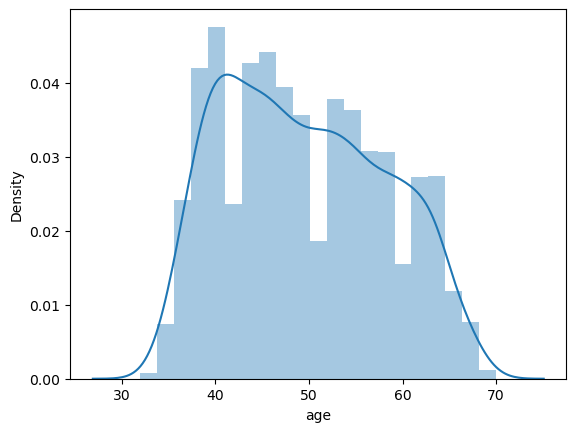

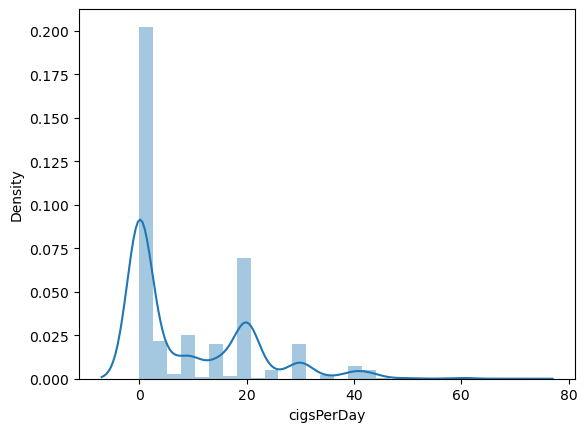

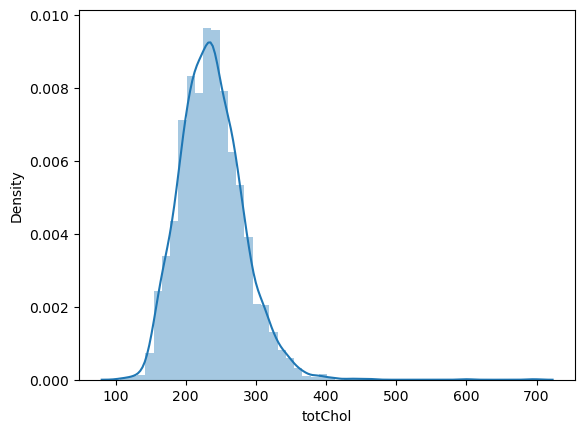

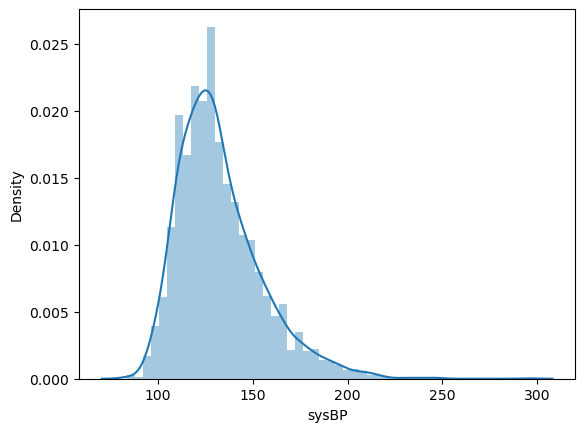

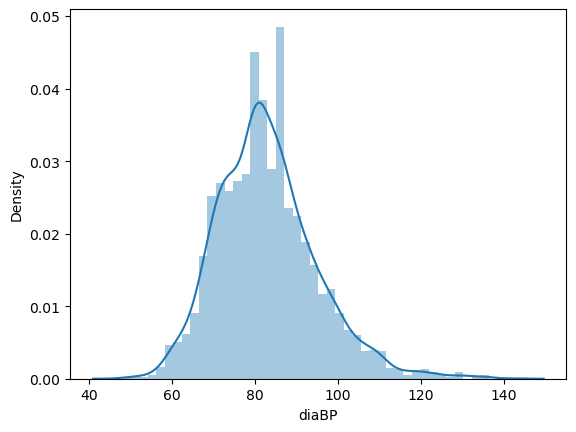

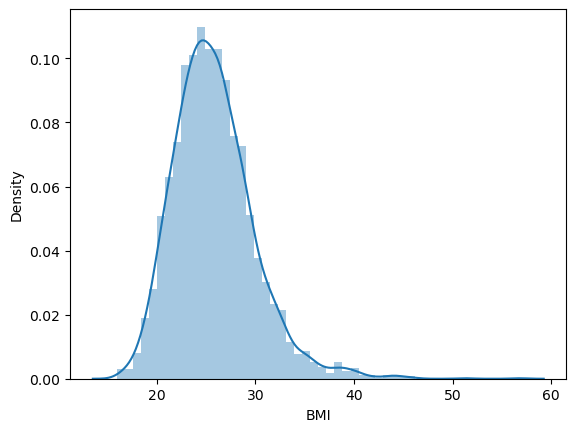

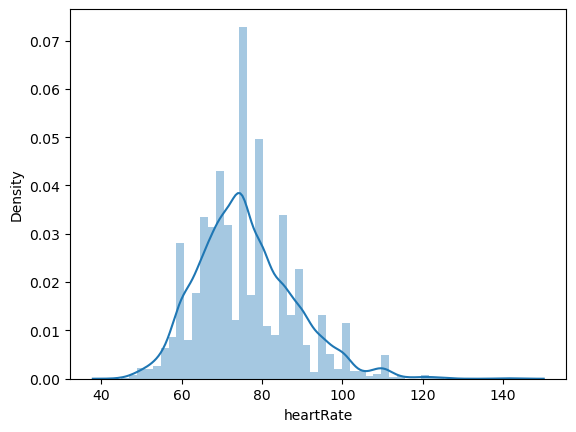

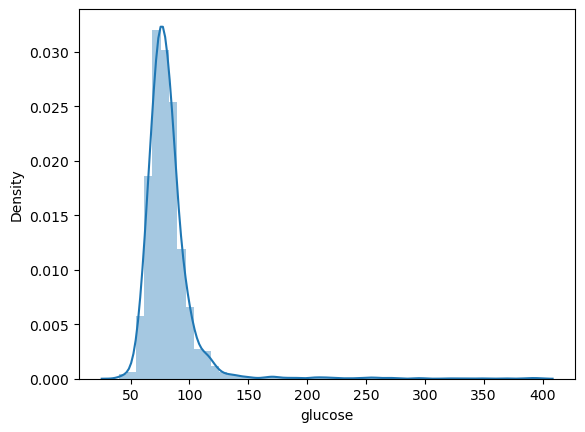

In [14]:
for col in quant_col :
    plt.figure()
    sns.distplot(df[col])

### Visualisation des variables catégorielles (histogrammes)

In [15]:
for col in qual_col :
    print(f'{col :-<50} {df[col].unique()}')

sex----------------------------------------------- [0 1]
is_smoking---------------------------------------- [1 0]
BPMeds-------------------------------------------- [ 0. nan  1.]
prevalentStroke----------------------------------- [0 1]
prevalentHyp-------------------------------------- [0 1]
diabetes------------------------------------------ [0 1]


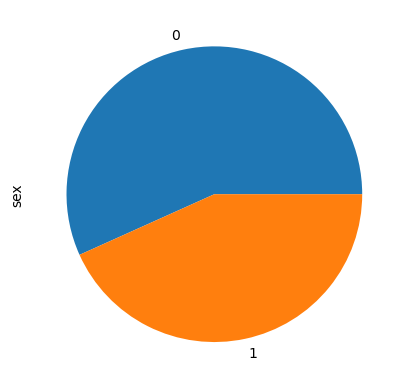

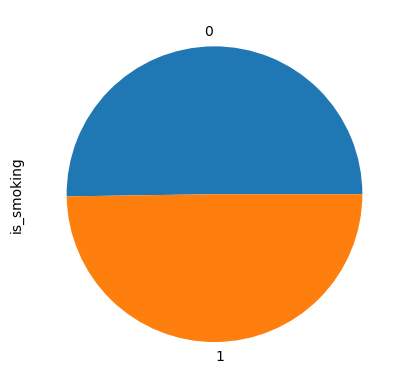

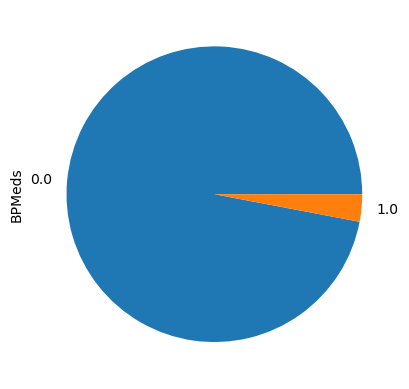

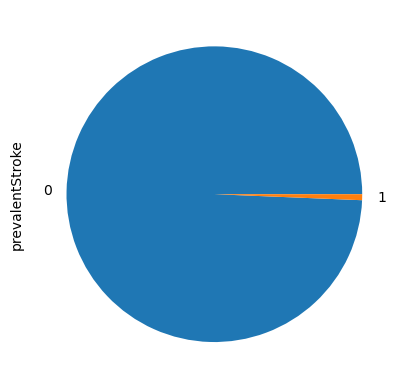

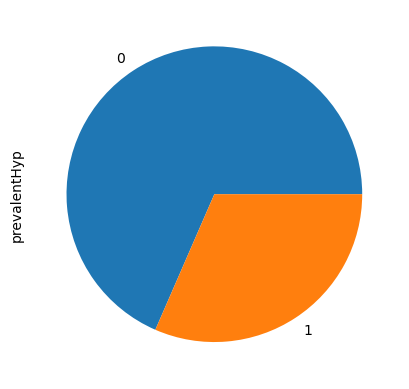

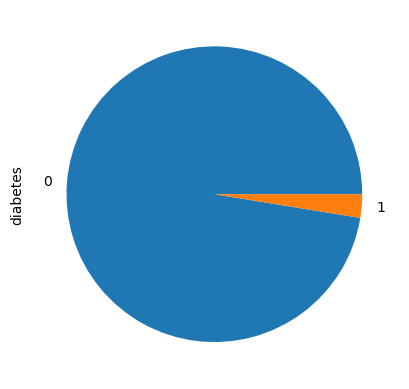

In [16]:
for col in qual_col :
    plt.figure()
    df[col].value_counts().plot.pie()

### Visualisation des relations features-target

In [17]:
# Création de 2 sous-ensembles positifs et négatifs :

positive_df = df[df['TenYearCHD'] == 1]
negative_df = df[df['TenYearCHD'] == 0]

Relations en la variables quantitatives et la cible :

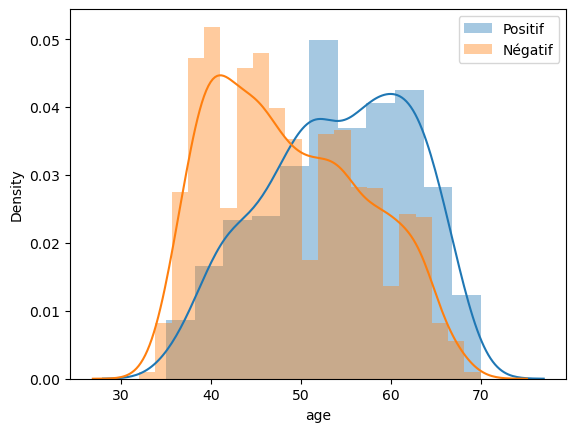

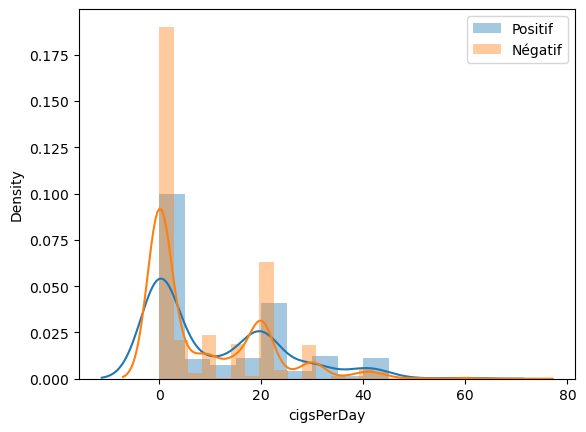

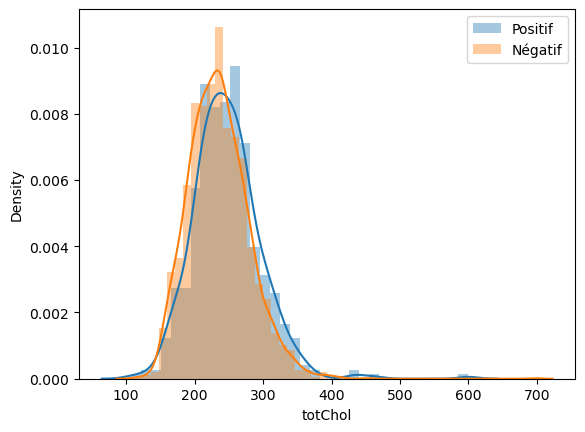

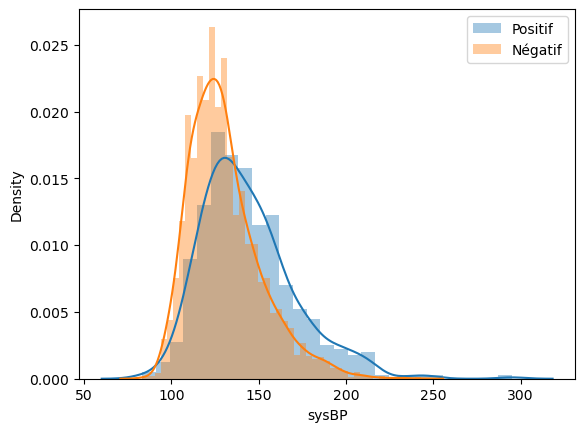

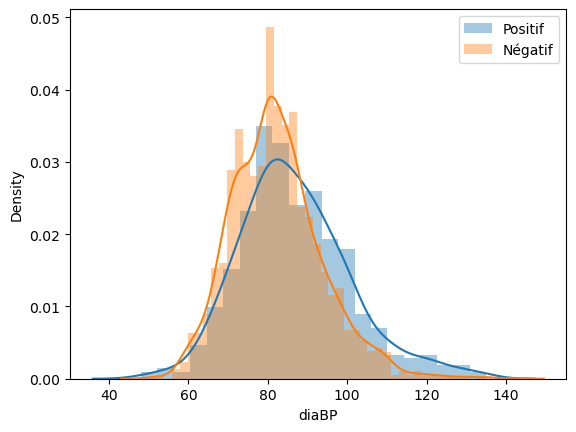

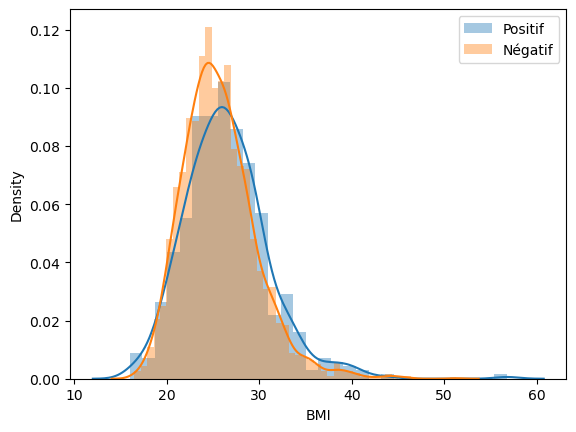

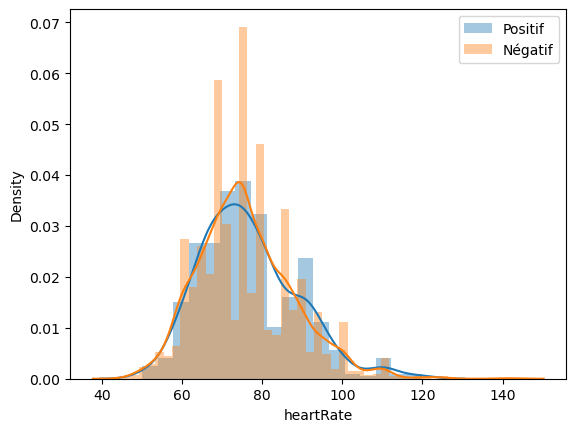

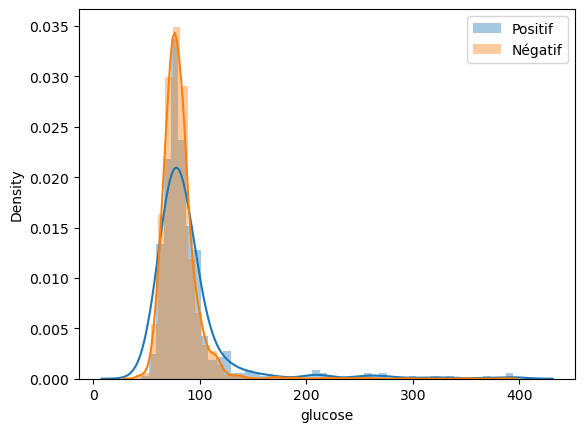

In [18]:
for col in quant_col : 
    plt.figure()
    sns.distplot(positive_df[col], label='Positif')
    sns.distplot(negative_df[col], label='Négatif')
    plt.legend()

Corrélations entre les variables qualitatives et la cible :

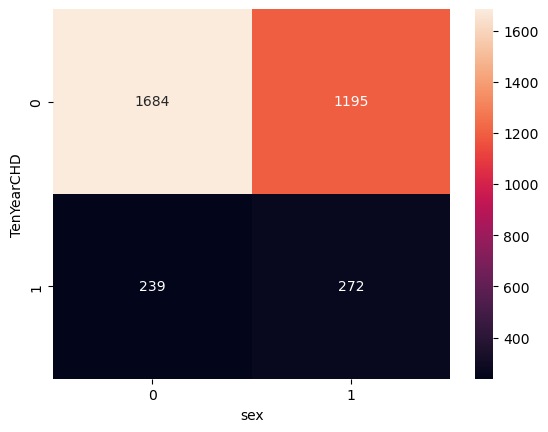

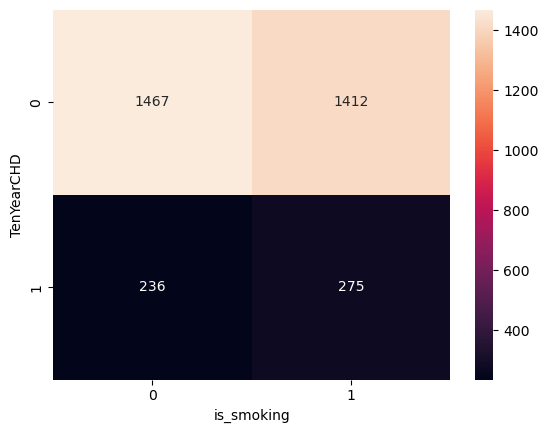

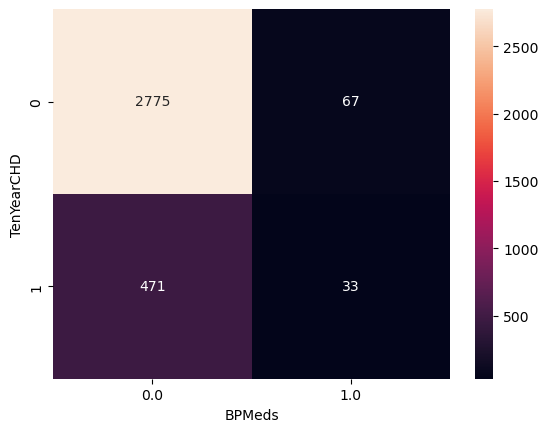

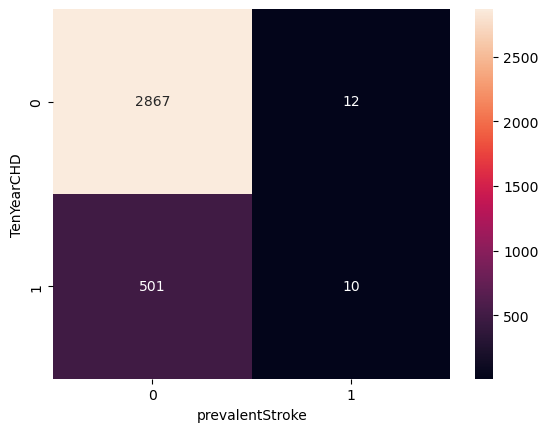

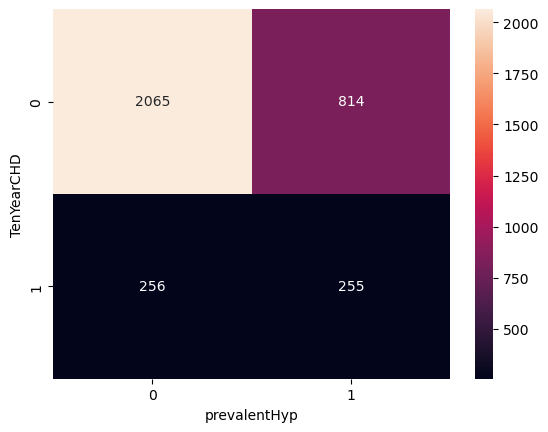

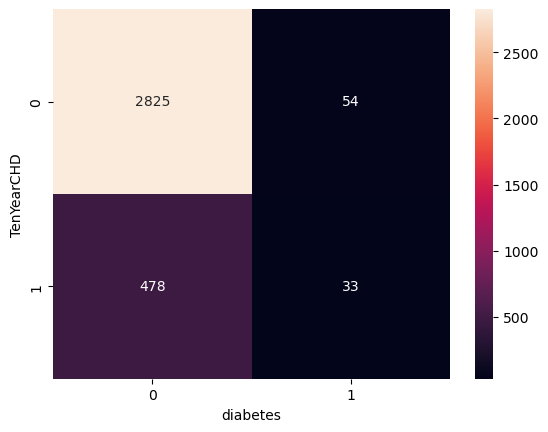

In [19]:
for col in qual_col :
    plt.figure()
    sns.heatmap(pd.crosstab(df['TenYearCHD'], df[col]), annot=True, fmt='d')

Corrélations entre les variables quantitatives et la cible :

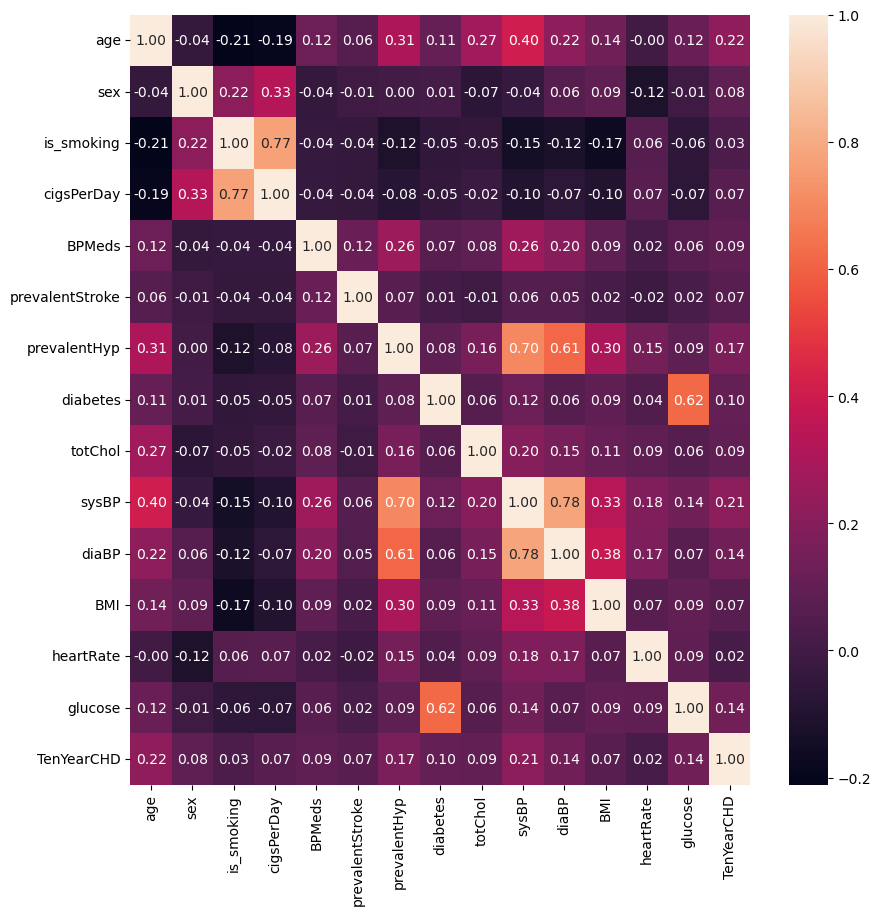

In [20]:
# Affichage de la heatmap de corrélation entre les variables quantitatives :
plt.figure(figsize =(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f");


In [21]:
#Affichage des taux de corrélation entre les features et la target :

df.corr()['TenYearCHD'].sort_values(ascending = False)

TenYearCHD         1.000000
age                0.224927
sysBP              0.212703
prevalentHyp       0.166544
glucose            0.138200
diaBP              0.135979
diabetes           0.103681
totChol            0.094306
BPMeds             0.088020
sex                0.084647
prevalentStroke    0.068627
BMI                0.066947
cigsPerDay         0.066778
is_smoking         0.034143
heartRate          0.020241
Name: TenYearCHD, dtype: float64

### Visualisation des outliers

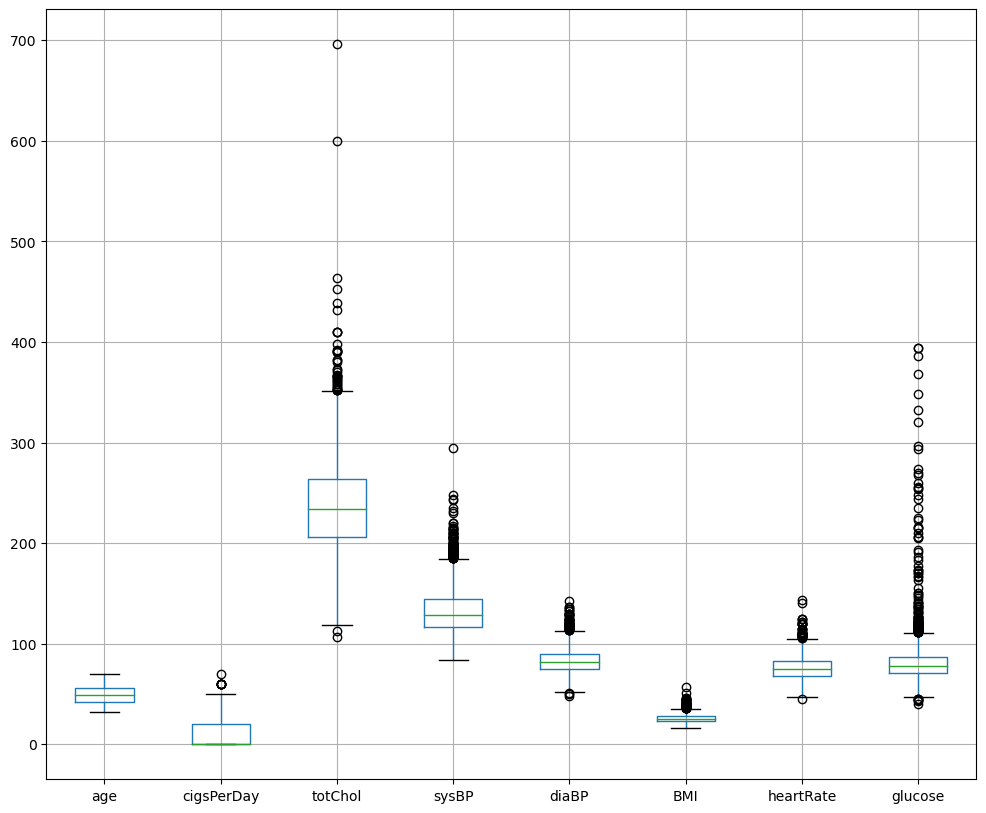

In [22]:
# Visualisation de la répartition des variables quantitatives à l'aide de boxplots.

plt.figure(figsize = (12,10))
df[quant_col].boxplot();

# 2 - Preprocessing

### Check-list preprocessing

Mise en forme des données
- Elimination des NaN
- Encodage des variables catégorielles
- Création des trainset/testset

Amélioration des perfomrances du modèle
- Suppression des outliers
- Feature selection
- Feature engineering
- Feature scaling

In [23]:
# Retour à l'état initial du dataset :

df = data.copy()

In [24]:
# Suppression de la colonne 'education' :

df = df.drop('education', axis = 1)

### TrainTest - Nettoyage - Encodage

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# Création d'un jeu d'entraînement et d'un jeu de test avec la fonction train_test_split : 

trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [27]:
# Vérification de l'équilibrage de la variable cible dans le Trainset : 

trainset['TenYearCHD'].value_counts()

0    2305
1     407
Name: TenYearCHD, dtype: int64

In [28]:
# Vérification de l'équilibrage de la variable cible dans le Testset : 

testset['TenYearCHD'].value_counts()

0    574
1    104
Name: TenYearCHD, dtype: int64

Nous avons un ratio de 15% de cas positifs dans le trainset et le testset, ce qui correspond à ce qui est observé dans le dataset d'origine.

In [29]:
# Encodage des variables qualitatives : 

# Affichage des différentes valeurs des variables catégorielles :

for col in df.select_dtypes('object') :
    print(f'{col :-<50} {df[col].unique()}')

sex----------------------------------------------- ['F' 'M']
is_smoking---------------------------------------- ['YES' 'NO']


In [30]:
# Création d'une fonction encodage, reprennant le dictionnaire et le code de la boucle ci-dessus :

def encodage(df) :
    code = {'F':0, 'M':1, 'YES':1, 'NO':0}
    
    for col in df.select_dtypes('object') :
        df[col] = df[col].map(code)
    
    return df

In [86]:
# Création d'une fonction pour gérer les NaN : 

def imputation(df) :
    df = df.dropna(axis=0)
    return df

In [87]:
# Création d'un fonction regroupant ces deux dernières fonctions et créant les datasets X (features) et y (target): 

def preprocessing(df):
    
    df = encodage(df)
    df = imputation(df)
    
    X = df.drop('TenYearCHD', axis = 1)
    y = df['TenYearCHD']
    
    print(y.value_counts())
    
    return X, y

In [88]:
# Création des jeux d'entraînement :

X_train, y_train = preprocessing(trainset)

0    2039
1     368
Name: TenYearCHD, dtype: int64


In [89]:
# Création des jeux de test :

X_test, y_test = preprocessing(testset)

0    508
1     89
Name: TenYearCHD, dtype: int64


# Modélisation

In [90]:
# Import des principales librairies pour démarrer : 

# Import des librairies d'évaluation et de métriques :

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

# Import des outils des librairies d'optimisation :

from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### Modèle Decision Tree Classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
preprocessor = make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif, k=5 ))

DTC = make_pipeline(preprocessor,StandardScaler(), DecisionTreeClassifier(random_state=0))

In [128]:
def evaluation(model) :
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N,train_score, val_score = learning_curve(model, X_train, y_train, cv=4, train_sizes=np.linspace(0.1,1,10), scoring='f1')
    plt.figure(figsize=(10,5))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[438  70]
 [ 67  22]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       508
           1       0.24      0.25      0.24        89

    accuracy                           0.77       597
   macro avg       0.55      0.55      0.55       597
weighted avg       0.77      0.77      0.77       597



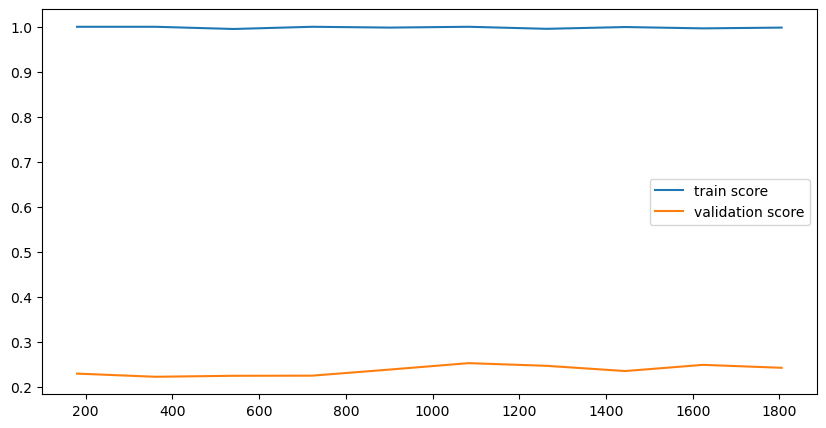

In [129]:
evaluation(DTC)

In [114]:
hyper_params = {'decisiontreeclassifier__criterion' : ['gini','entropy','log_loss'], 
               'pipeline__polynomialfeatures__degree' : [2,3,4],
               'pipeline__selectkbest__k' : range(0,200) }

In [115]:
grid = RandomizedSearchCV(DTC, hyper_params, scoring = 'recall', cv= 4, n_iter = 100)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'pipeline__selectkbest__k': 33, 'pipeline__polynomialfeatures__degree': 2, 'decisiontreeclassifier__criterion': 'gini'}
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       508
           1       0.23      0.30      0.26        89

    accuracy                           0.75       597
   macro avg       0.55      0.56      0.56       597
weighted avg       0.78      0.75      0.76       597



[[419  89]
 [ 62  27]]
              precision    recall  f1-score   support

           0       0.87      0.82      0.85       508
           1       0.23      0.30      0.26        89

    accuracy                           0.75       597
   macro avg       0.55      0.56      0.56       597
weighted avg       0.78      0.75      0.76       597



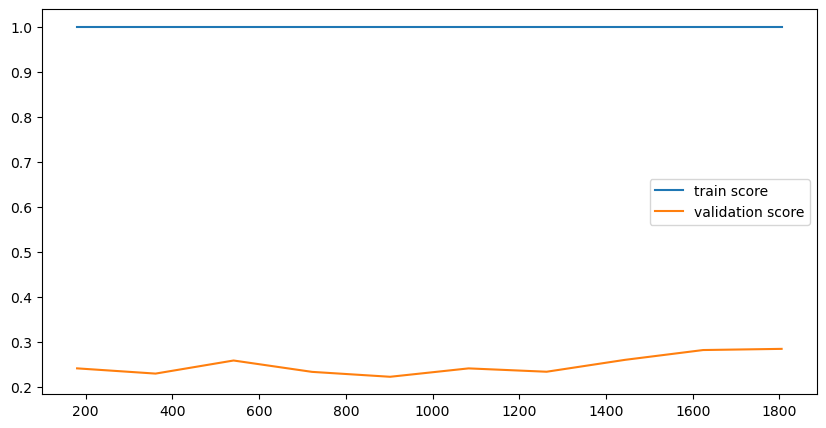

In [116]:
evaluation(grid.best_estimator_)

In [117]:
print(grid.best_estimator_.score(X_test, y_test))

0.7470686767169179


Le modèle Decision Tree Classifier semble assez médiocre.

### Choix du modèle avec LazyPredict

In [45]:
import lazypredict

In [46]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  9.61it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.67               0.66     0.66      0.71   
QuadraticDiscriminantAnalysis      0.84               0.58     0.58      0.82   
LabelSpreading                     0.80               0.58     0.58      0.79   
GaussianNB                         0.82               0.57     0.57      0.80   
BernoulliNB                        0.80               0.57     0.57      0.79   
LabelPropagation                   0.79               0.57     0.57      0.79   
Perceptron                         0.70               0.56     0.56      0.73   
LinearDiscriminantAnalysis         0.85               0.56     0.56      0.81   
ExtraTreeClassifier                0.77               0.55     0.55      0.77   
LGBMClassifier                     0.84               0.55     0.55      0.81   
BaggingClassifier           

### Essai avec Nearest Centroid

In [47]:
from sklearn.neighbors import NearestCentroid

[[328 180]
 [ 36  53]]
              precision    recall  f1-score   support

           0       0.90      0.65      0.75       508
           1       0.23      0.60      0.33        89

    accuracy                           0.64       597
   macro avg       0.56      0.62      0.54       597
weighted avg       0.80      0.64      0.69       597



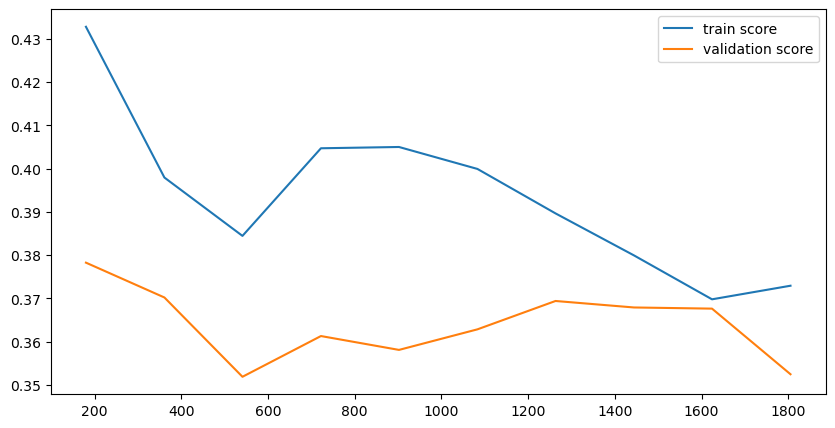

In [48]:
Nearest = make_pipeline(preprocessor,StandardScaler(), NearestCentroid())

#Nearest = NearestCentroid()

evaluation(Nearest)

In [49]:
Nearest.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                                 ('selectkbest', SelectKBest(k=7))])),
                ('standardscaler', StandardScaler()),
                ('nearestcentroid', NearestCentroid())])>

In [50]:
hyper_params = {'nearestcentroid__metric' : ['cityblock','cosine','euclidean','haversine','l1','l2','manhattan'],
               'pipeline__polynomialfeatures__degree' : [2,3,4],
               'pipeline__selectkbest__k' : range(0,25) }

In [51]:
grid = RandomizedSearchCV(Nearest, hyper_params, scoring = 'recall', cv= 4, n_iter = 100)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'pipeline__selectkbest__k': 1, 'pipeline__polynomialfeatures__degree': 2, 'nearestcentroid__metric': 'cosine'}
              precision    recall  f1-score   support

           0       0.92      0.60      0.73       508
           1       0.24      0.72      0.36        89

    accuracy                           0.62       597
   macro avg       0.58      0.66      0.54       597
weighted avg       0.82      0.62      0.67       597



[[304 204]
 [ 25  64]]
              precision    recall  f1-score   support

           0       0.92      0.60      0.73       508
           1       0.24      0.72      0.36        89

    accuracy                           0.62       597
   macro avg       0.58      0.66      0.54       597
weighted avg       0.82      0.62      0.67       597



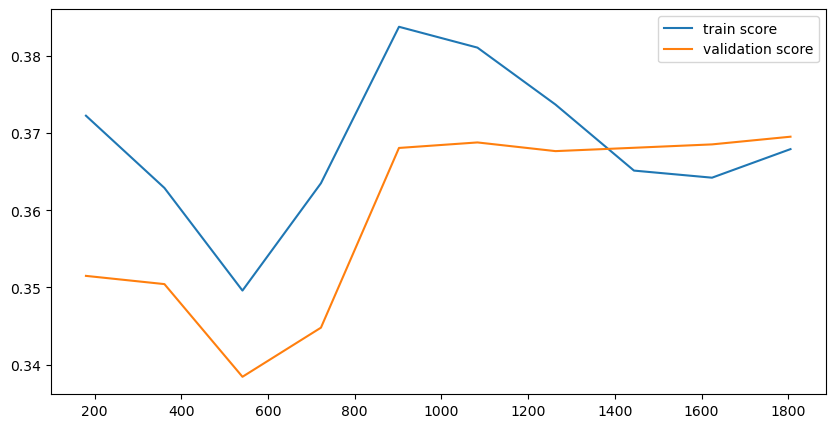

In [52]:
evaluation(grid.best_estimator_)

In [53]:
print(grid.best_estimator_.score(X_test, y_test))

0.6164154103852596


### Essai avec QuadraticDiscriminantAnalysis

In [54]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

[[464  44]
 [ 71  18]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       508
           1       0.29      0.20      0.24        89

    accuracy                           0.81       597
   macro avg       0.58      0.56      0.56       597
weighted avg       0.78      0.81      0.79       597



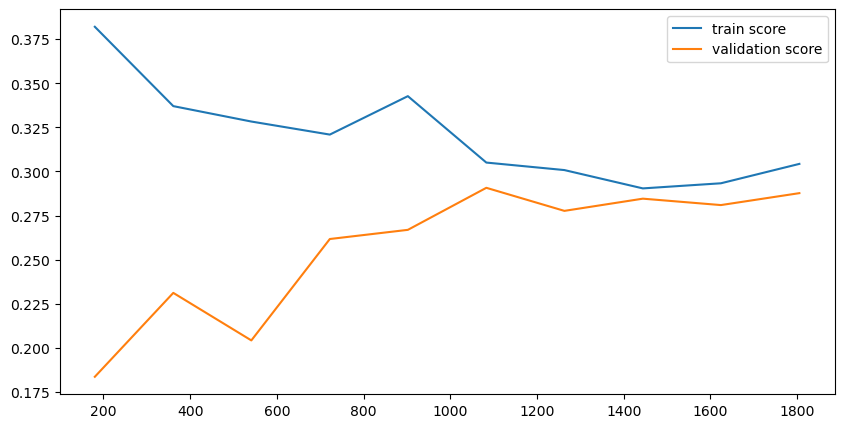

In [55]:
Quadra = make_pipeline(preprocessor,StandardScaler(), QuadraticDiscriminantAnalysis())

#Quadra = QuadraticDiscriminantAnalysis()

evaluation(Quadra)

In [56]:
hyper_params = {'quadraticdiscriminantanalysis__tol' : [1e-3, 1e-4, 0.0005],
               'pipeline__polynomialfeatures__degree' : [2,3,4],
               'pipeline__selectkbest__k' : range(20,40) }

{'quadraticdiscriminantanalysis__tol': 0.0001, 'pipeline__selectkbest__k': 33, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       508
           1       0.27      0.52      0.35        89

    accuracy                           0.72       597
   macro avg       0.58      0.64      0.59       597
weighted avg       0.81      0.72      0.75       597

[[383 125]
 [ 43  46]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       508
           1       0.27      0.52      0.35        89

    accuracy                           0.72       597
   macro avg       0.58      0.64      0.59       597
weighted avg       0.81      0.72      0.75       597



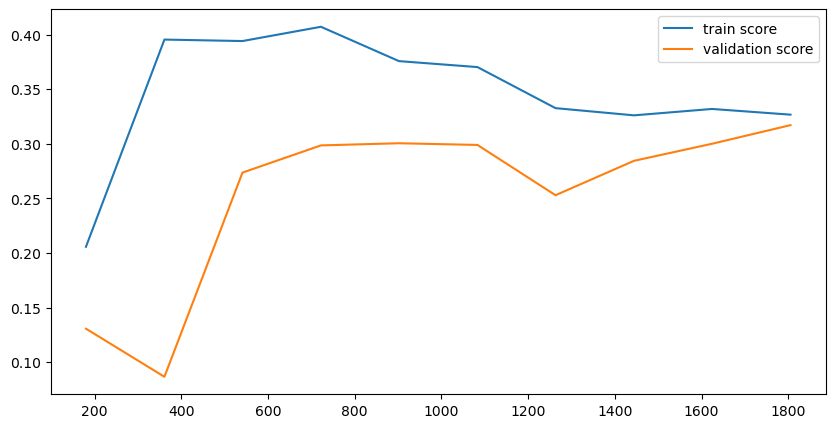

In [57]:
grid = RandomizedSearchCV(Quadra, hyper_params, scoring = 'recall', cv= 4, n_iter = 100)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

evaluation(grid.best_estimator_)

In [58]:
print(grid.best_estimator_.score(X_test, y_test))

0.7185929648241206
